# Information Retrieval
## Assignment 3

#### Samad Shahid 2019446
#### Shashwat Goyal 2019447

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import string
from collections import defaultdict
from nltk.corpus import stopwords
import os
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords') # downloading packages

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
with open('CA-GrQc.txt','r', encoding = "utf-8", errors = 'replace') as f:
  next(f)
  next(f)
  next(f)
  next(f) 
  corpus = f.read().replace('	', ' ')

  
# next(f)
# next(f)
# next(f)
# next(f)
corpus=word_tokenize(corpus)

In [ ]:
print(len(corpus))
print(corpus)

57960
['3466', '937', '3466', '5233', '3466', '8579', '3466', '10310', '3466', '15931', '3466', '17038', '3466', '18720', '3466', '19607', '10310', '1854', '10310', '3466', '10310', '4583', '10310', '5233', '10310', '9572', '10310', '10841', '10310', '13056', '10310', '14982', '10310', '16310', '10310', '19640', '10310', '23855', '10310', '24372', '10310', '24814', '5052', '899', '5052', '1796', '5052', '2287', '5052', '3096', '5052', '3386', '5052', '4472', '5052', '5346', '5052', '5740', '5052', '6094', '5052', '6376', '5052', '9124', '5052', '10235', '5052', '10427', '5052', '10597', '5052', '15159', '5052', '16148', '5052', '16741', '5052', '18235', '5052', '18549', '5052', '19297', '5052', '20511', '5052', '20595', '5052', '20613', '5052', '24371', '5052', '24559', '5052', '24731', '5052', '25102', '5052', '25271', '5052', '25396', '5346', '1658', '5346', '4822', '5346', '5052', '5346', '6864', '5346', '7689', '5346', '7926', '5346', '9124', '5346', '10268', '5346', '12971', '5346

In [ ]:
# No of edges
# Each edge has been double counted in the dataset
# There is a row for edge A B, and also another row for B A.
# This has to be counted as 1 edge and not 2.
edgeCount = int((len(corpus)/2)/2)
print(edgeCount)

14490


In [ ]:
node_index={}
count=0
for nodes in corpus:
  if nodes not in node_index.keys():
    node_index[nodes]=count
    count=count+1
print(corpus[0])
print(corpus[1])

3466
937


In [ ]:
print(node_index)

{'3466': 0, '937': 1, '5233': 2, '8579': 3, '10310': 4, '15931': 5, '17038': 6, '18720': 7, '19607': 8, '1854': 9, '4583': 10, '9572': 11, '10841': 12, '13056': 13, '14982': 14, '16310': 15, '19640': 16, '23855': 17, '24372': 18, '24814': 19, '5052': 20, '899': 21, '1796': 22, '2287': 23, '3096': 24, '3386': 25, '4472': 26, '5346': 27, '5740': 28, '6094': 29, '6376': 30, '9124': 31, '10235': 32, '10427': 33, '10597': 34, '15159': 35, '16148': 36, '16741': 37, '18235': 38, '18549': 39, '19297': 40, '20511': 41, '20595': 42, '20613': 43, '24371': 44, '24559': 45, '24731': 46, '25102': 47, '25271': 48, '25396': 49, '1658': 50, '4822': 51, '6864': 52, '7689': 53, '7926': 54, '10268': 55, '12971': 56, '18600': 57, '20421': 58, '20886': 59, '21048': 60, '22393': 61, '23186': 62, '23214': 63, '23298': 64, '23945': 65, '24939': 66, '339': 67, '624': 68, '3731': 69, '4743': 70, '5407': 71, '6610': 72, '6700': 73, '8045': 74, '9099': 75, '9639': 76, '9785': 77, '12141': 78, '15184': 79, '15784':

In [ ]:
# Node count
nodeCount = len(node_index)
print(nodeCount)

5242


In [ ]:
import itertools
adjMatrix = []
edge_list=[]
for i in range(len(node_index)):
  adjMatrix.append([0 for i in range(len(node_index))])


for i in range(0,len(corpus)-1,2):
  # print(corpus[i])
  adjMatrix[node_index[corpus[i]]][node_index[corpus[i+1]]]=1
  adjMatrix[node_index[corpus[i+1]]][node_index[corpus[i]]]=1
  edge_list.append((corpus[i],corpus[i+1]))

result = [] #edge list without duplicates
for pair in edge_list:
    a, b = pair
    temp = (a, b) if a < b else (b, a)
    result.append(temp)

print(len(list(set(result))))
# print(edge_list)

# corpus=f.read().replace('	','')
# print(node_index)

14496


In [ ]:
import networkx as nx

G = nx.Graph()
 
G.add_edges_from(result)
 
print(nx.clustering(G))

{'3466': 0.21428571428571427, '937': 0.3, '5233': 1.0, '8579': 0.3, '10310': 0.05128205128205128, '15931': 0.2, '17038': 0.1323529411764706, '18720': 1.0, '19607': 0.6666666666666666, '1854': 0.25, '4583': 0.3333333333333333, '9572': 0.0659536541889483, '10841': 0.09523809523809523, '13056': 0.17777777777777778, '14982': 1.0, '16310': 0.08823529411764706, '19640': 0.24333333333333335, '23855': 0.14285714285714285, '24372': 0, '24814': 0.26666666666666666, '5052': 0.06157635467980296, '899': 0.6666666666666666, '1796': 1.0, '2287': 0.17582417582417584, '3096': 0.2727272727272727, '3386': 0.41818181818181815, '4472': 0.16666666666666666, '5346': 0.07894736842105263, '5740': 0, '6094': 0.5, '6376': 1.0, '9124': 0.09057971014492754, '10235': 0.1794871794871795, '10427': 0.2857142857142857, '10597': 0.2, '15159': 0.5, '16148': 0.11764705882352941, '16741': 0.23809523809523808, '18235': 0, '18549': 0, '19297': 0.075, '20511': 0.3165322580645161, '20595': 0.19444444444444445, '20613': 0.2, '2

In [ ]:
avg_inDeg = (2*edgeCount) / nodeCount
print(avg_inDeg)

5.528424265547501


In [ ]:
# Undirected graph, thus indegree = outdegree
avg_outDeg = avg_inDeg
print(avg_outDeg)

5.528424265547501


In [ ]:
# Undirected graph, thus node with max in degree = node with max out degree
# This will be the node with max occurences of 1's in out adjacency matrix
curMax_val = adjMatrix[0].count(1)
curMax_ind = 0
for i in range(len(adjMatrix)):
  if (adjMatrix[i].count(1) > curMax_val):
    curMax_val = adjMatrix[i].count(1)
    curMax_ind = i

# print(curMax_val)
nodeVal = list(node_index.keys())[list(node_index.values()).index(curMax_ind)]
# print(nodeVal)
print("Node: " + str(nodeVal) + " has max indegrees and outdegrees which are = " + str(curMax_val))

Node: 21012 has max indegrees and outdegrees which are = 81


In [ ]:
# Max possible edges
maxPossibleEdges = (nodeCount*(nodeCount-1))/2

# Density of graph
density = edgeCount / maxPossibleEdges
print(density)

0.0010548414931401452


In [ ]:
# Degree Distribution plot
degreesPerNode = {}

for i in range(len(adjMatrix)):
  degreesPerNode[i] = adjMatrix[i].count(1)

degrees_value = list(set(degreesPerNode.values()))
degrees_value.sort()
degrees_count = []

for val in degrees_value:
  degrees_count.append( list(degreesPerNode.values()).count(val) )

print(len(degrees_value))
print(len(degrees_count))

65
65


In [ ]:
print(degrees_count)

[1197, 1114, 776, 498, 296, 225, 159, 141, 99, 92, 66, 46, 57, 38, 48, 25, 43, 21, 18, 28, 16, 12, 44, 8, 8, 7, 3, 5, 3, 8, 9, 3, 9, 37, 1, 2, 5, 1, 1, 3, 19, 2, 1, 13, 2, 4, 3, 4, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1]


In [ ]:
sum = 0
for c in degrees_count:
  sum += c
print(sum)

5242


In [ ]:
print(degrees_value)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 53, 54, 55, 56, 57, 59, 60, 62, 63, 65, 66, 67, 68, 77, 79, 81]


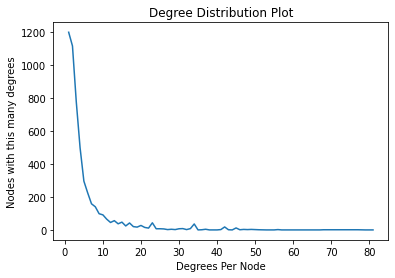

In [ ]:
plt.xlabel("Degrees Per Node")
plt.ylabel("Nodes with this many degrees")
plt.title("Degree Distribution Plot")
plt.plot(degrees_value, degrees_count)
plt.show()

In [ ]:
# Local Clustering Coeeficient

# We first need to calculate the traingle count of each node

triangleCount = {}

for i in range(len(adjMatrix)):
  # degreesPerNode[i] = adjMatrix[i].count(1)
  connectedTo = []
  for j in range(len(adjMatrix[i])):
    if (adjMatrix[i][j] == 1):
      connectedTo.append(j)
  count = 0
  for j in range(len(connectedTo)):
    for k in range(j+1, len(connectedTo)):
      if (adjMatrix[j][k] == 1):
        count += 1
  triangleCount[i] = count


print(triangleCount)

{0: 10, 1: 6, 2: 1, 3: 6, 4: 18, 5: 15, 6: 25, 7: 2, 8: 4, 9: 10, 10: 2, 11: 45, 12: 8, 13: 15, 14: 1, 15: 25, 16: 32, 17: 10, 18: 0, 19: 28, 20: 37, 21: 2, 22: 1, 23: 19, 24: 17, 25: 16, 26: 4, 27: 28, 28: 0, 29: 4, 30: 1, 31: 31, 32: 18, 33: 10, 34: 7, 35: 4, 36: 26, 37: 8, 38: 0, 39: 0, 40: 24, 41: 42, 42: 14, 43: 15, 44: 29, 45: 30, 46: 0, 47: 8, 48: 24, 49: 30, 50: 7, 51: 1, 52: 1, 53: 42, 54: 14, 55: 8, 56: 0, 57: 4, 58: 2, 59: 1, 60: 7, 61: 6, 62: 7, 63: 4, 64: 1, 65: 2, 66: 2, 67: 38, 68: 25, 69: 14, 70: 32, 71: 14, 72: 117, 73: 40, 74: 21, 75: 14, 76: 40, 77: 117, 78: 6, 79: 18, 80: 16, 81: 29, 82: 28, 83: 28, 84: 32, 85: 4, 86: 14, 87: 14, 88: 7, 89: 28, 90: 18, 91: 19, 92: 35, 93: 10, 94: 2, 95: 8, 96: 18, 97: 19, 98: 14, 99: 4, 100: 107, 101: 158, 102: 38, 103: 143, 104: 29, 105: 4, 106: 0, 107: 0, 108: 51, 109: 0, 110: 1, 111: 14, 112: 0, 113: 7, 114: 7, 115: 0, 116: 1, 117: 4, 118: 26, 119: 26, 120: 1, 121: 1, 122: 4, 123: 27, 124: 16, 125: 1, 126: 1, 127: 6, 128: 8, 129:

In [ ]:
lcc = {}

for i in list(triangleCount.keys()):
  if (degreesPerNode[i] <= 1):
    lcc[i] = 0
  else:
    lcc[i] = (2*triangleCount[i]) / (degreesPerNode[i] * (degreesPerNode[i]-1))

In [ ]:
print(lcc)

{0: 0.35714285714285715, 1: 0.6, 2: 1.0, 3: 0.6, 4: 0.23076923076923078, 5: 0.3333333333333333, 6: 0.18382352941176472, 7: 0.6666666666666666, 8: 0.6666666666666666, 9: 0.35714285714285715, 10: 0.6666666666666666, 11: 0.08021390374331551, 12: 0.38095238095238093, 13: 0.3333333333333333, 14: 1.0, 15: 0.18382352941176472, 16: 0.10666666666666667, 17: 0.35714285714285715, 18: 0, 19: 0.13333333333333333, 20: 0.09113300492610837, 21: 0.6666666666666666, 22: 1.0, 23: 0.2087912087912088, 24: 0.25757575757575757, 25: 0.2909090909090909, 26: 0.6666666666666666, 27: 0.14736842105263157, 28: 0, 29: 0.6666666666666666, 30: 1.0, 31: 0.11231884057971014, 32: 0.23076923076923078, 33: 0.35714285714285715, 34: 0.4666666666666667, 35: 0.6666666666666666, 36: 0.16993464052287582, 37: 0.38095238095238093, 38: 0, 39: 0, 40: 0.2, 41: 0.0846774193548387, 42: 0.3888888888888889, 43: 0.3333333333333333, 44: 0.12554112554112554, 45: 0.11857707509881422, 46: 0, 47: 0.38095238095238093, 48: 0.2, 49: 0.11857707509

In [ ]:
# Plotting distribution plot for LCC

lcc_value = list(set(lcc.values()))
lcc_value.sort()
lcc_count = []

for val in lcc_value:
  lcc_count.append( list(lcc.values()).count(val) )

print(len(lcc_value))
print(len(lcc_count))

63
63


In [ ]:
print(lcc_value)

[0, 0.04803635183382019, 0.04876543209876543, 0.04887218045112782, 0.051360842844600525, 0.051560379918588875, 0.05268065268065268, 0.052884615384615384, 0.05478750640040963, 0.05499735589635114, 0.05593220338983051, 0.05669199298655757, 0.05827067669172932, 0.05974025974025974, 0.06127946127946128, 0.06219426974143955, 0.06313497822931785, 0.0663265306122449, 0.06648936170212766, 0.0666049953746531, 0.06666666666666667, 0.06859903381642513, 0.06866002214839424, 0.06868686868686869, 0.06871035940803383, 0.06968641114982578, 0.07073170731707316, 0.07179487179487179, 0.07657657657657657, 0.07681365576102418, 0.07777777777777778, 0.07899159663865546, 0.08021390374331551, 0.08333333333333333, 0.0846774193548387, 0.08602150537634409, 0.08735632183908046, 0.09113300492610837, 0.09523809523809523, 0.09971509971509972, 0.10461538461538461, 0.10666666666666667, 0.11231884057971014, 0.11857707509881422, 0.12554112554112554, 0.13333333333333333, 0.14736842105263157, 0.15789473684210525, 0.1699346

In [ ]:
print(lcc_count)

[1197, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 4, 3, 4, 2, 2, 2, 13, 1, 19, 3, 1, 5, 1, 2, 1, 37, 9, 3, 9, 8, 3, 5, 3, 7, 8, 8, 44, 12, 16, 28, 18, 21, 43, 73, 38, 57, 46, 66, 92, 141, 159, 99, 225, 296, 1274, 1114]


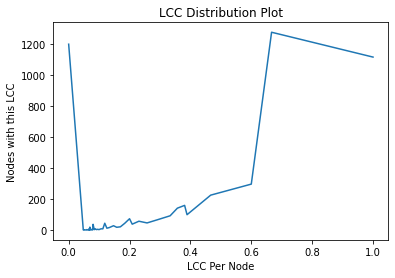

In [ ]:
plt.xlabel("LCC Per Node")
plt.ylabel("Nodes with this LCC")
plt.title("LCC Distribution Plot")
plt.plot(lcc_value, lcc_count)
plt.show()

In [ ]:
import networkx as nx
# G=nx.barabasi_albert_graph(60,41)
G = nx.Graph() 
G.add_edges_from(result)

pr=nx.pagerank(G,0.5)  # pagerank score for 50 iterations
sum=0
for i in pr.values():
  sum+=i;
pr_avg=sum/len(pr)
print(pr)
print(pr_avg)

{'3466': 0.0002497508948925509, '937': 0.00018892242784676827, '5233': 0.00012480882854241004, '8579': 0.00018955692087435432, '10310': 0.00036088579933642645, '15931': 0.000280069444753346, '17038': 0.00040605526725463146, '18720': 0.0001460045954208248, '19607': 0.00016834232385422304, '1854': 0.0003230057884216195, '4583': 0.0001453932437706229, '9572': 0.0008267724867136928, '10841': 0.00022096532728157722, '13056': 0.000265959877109848, '14982': 0.00012251940880467728, '16310': 0.0004447716318217638, '19640': 0.0003276169952332866, '23855': 0.0002669641451870518, '24372': 0.00010923166824538676, '24814': 0.0004708733409939816, '5052': 0.0007020571696998156, '899': 0.00013180619569266999, '1796': 0.00011884872689797276, '2287': 0.00038981521755921636, '3096': 0.00029338098700097405, '3386': 0.000251001143750107, '4472': 0.00018661820718995207, '5346': 0.0005679192766531178, '5740': 0.0001074462636765455, '6094': 0.00014628709978133949, '6376': 0.0001307736510035224, '9124': 0.00067

In [ ]:
hubs, authorities = nx.hits(G, max_iter = 50, normalized = True)
print("Hub Scores: ", hubs)

sum1=0
for i in hubs.values():
  sum1+=i;
hubs_avg=sum1/len(hubs)

sum2=0
for i in authorities.values():
  sum2+=i;
auth_avg=sum2/len(authorities)

print("Authority Scores: ", authorities)

Hub Scores:  {'3466': 4.134765427976191e-06, '937': 1.7295705867895827e-06, '5233': 7.916819286148174e-07, '8579': 6.080693618936919e-07, '10310': 3.197912166069028e-05, '15931': 1.1239891345233217e-05, '17038': 0.00014156304505522126, '18720': 3.44886866417387e-07, '19607': 3.5793090117892027e-07, '1854': 9.685255245547792e-07, '4583': 9.345858326982022e-07, '9572': 0.00039936056310743766, '10841': 1.2891145468730569e-06, '13056': 1.098197695391994e-05, '14982': 9.417852285776173e-07, '16310': 2.378402468277401e-05, '19640': 0.001012963880396229, '23855': 1.1257529355065009e-06, '24372': 7.010403684761047e-07, '24814': 8.030925553604788e-07, '5052': 3.7665781079697346e-05, '899': 1.3050742958759772e-06, '1796': 1.0764841993729674e-06, '2287': 3.379309670415154e-05, '3096': 1.1796218895136806e-06, '3386': 1.1439834981173264e-05, '4472': 9.928904317449156e-06, '5346': 1.310355032794234e-06, '5740': 8.25702260594277e-07, '6094': 8.828281651298696e-07, '6376': 1.043361857850342e-06, '9124

pagerank average: 0.00019076688286913306
hubs average: 0.00019076688286913442
authorities average: 0.00019076688286913447


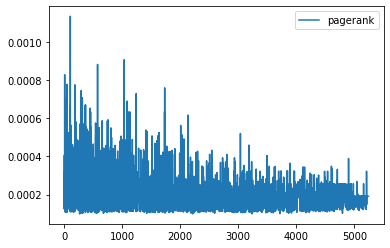

In [ ]:
p = list(set(pr.values()))
p.sort()
pr_count = []

for val in p:
  pr_count.append( list(pr.values()).count(val) )

# print(p)
# print(pr_count)
print("pagerank average:", pr_avg)
print("hubs average:", hubs_avg)
print("authorities average:", auth_avg)

# plt.plot(list(hubs.values()),label="hubs")
plt.plot(list(pr.values()),label="pagerank")
# plt.plot(list(authorities.values()),label="authorities")
plt.legend()
# plt.plot(p, pr_count)
plt.show()

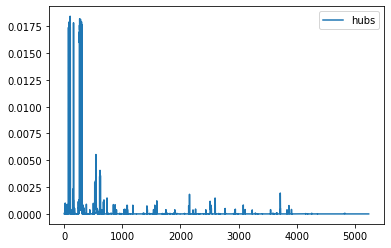

In [ ]:
plt.plot(list(hubs.values()),label="hubs")
plt.legend()

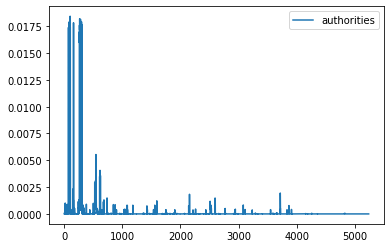

In [ ]:
plt.plot(list(authorities.values()),label="authorities")
plt.legend()

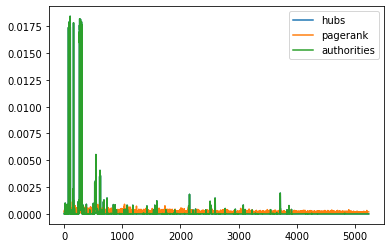

In [ ]:
plt.plot(list(hubs.values()),label="hubs")
plt.plot(list(pr.values()),label="pagerank")
plt.plot(list(authorities.values()),label="authorities")
plt.legend()
# plt.plot(p, pr_count)
plt.show()